# Linear Regression Practice

In this lab we are going to use a 1994 dataset that has detailed prices on items sold at over 400 Burguer King, Wendy's, KFC and Roy Roger restaurants in New Jersey and Pennsivania.

Roy Roger https://en.wikipedia.org/wiki/Roy_Rogers_Restaurants


The data set has zip-code level data on various items prices, characterisitics of the zip code population.

The idea with this exercise is to see wheter fast-food restaurants charge higher prices in areas with a larger concentration of African Americans. 

### Data Set Characteristics:  
K. Graddy (1997), "Do Fast-Food Chains Price Discriminate on the Race and Income Characteristics of an Area?" Journal of Business and Economic Statistics 15, 391-401.
http://people.brandeis.edu/~kgraddy/published%20papers/GraddyK_jbes1997.pdf

    :Number of Instances: 410
    
    :Attribute Information
    
    psoda         price of medium soda, 1st wave
    pfries        price of small fries, 1st wave
    pentree       price entree (burger or chicken), 1st wave
    wagest        starting wage, 1st wave
    nmgrs         number of managers, 1st wave
    nregs         number of registers, 1st wave
    hrsopen       hours open, 1st wave
    emp           number of employees, 1st wave
    psoda2        price of medium soday, 2nd wave
    pfries2       price of small fries, 2nd wave
    pentree2      price entree, 2nd wave
    wagest2       starting wage, 2nd wave
    nmgrs2        number of managers, 2nd wave
    nregs2        number of registers, 2nd wave
    hrsopen2      hours open, 2nd wave
    emp2          number of employees, 2nd wave
    compown       =1 if company owned
    chain         BK = 1, KFC = 2, Roy Rogers = 3, Wendy's = 4
    density       population density, town
    crmrte        crime rate, town
    state         NJ = 1, PA = 2
    prpblck       proportion black, zipcode
    prppov        proportion in poverty, zipcode
    prpncar       proportion no car, zipcode
    hseval        median housing value, zipcode
    nstores       number of stores, zipcode
    income        median family income, zipcode
    county        county label
    lpsoda        log(psoda)
    lpfries       log(pfries)
    lhseval       log(hseval)
    lincome       log(income)
    ldensity      log(density)
    NJ            =1 for New Jersey
    BK            =1 if Burger King
    KFC           =1 if Kentucky Fried Chicken
    RR            =1 if Roy Rogers


In [7]:
# data modules
import numpy as np
import scipy.stats as stats
import pandas as pd

# plotting modules
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

# Stats/Regresions Packages
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# make sure charts appear in the notebook:
%matplotlib inline
%config InlineBackend.figure_format ='retina'

#### 1. Read the data, print the last 5 rows, perform EDA (missing values, data types, describe)

In [6]:
path_to_file = '/Users/ryandunlap/Desktop/DSI-SF-2/datasets/fast_food_chains/discrim.csv' ## Change it to your path
fast_food = pd.read_csv(path_to_file)
fast_food.head()

,psoda,pfries,pentree,wagest,nmgrs,nregs,hrsopen,emp,psoda2,pfries2,...,county,lpsoda,lpfries,lhseval,lincome,ldensity,NJ,BK,KFC,RR
0,1.12,1.06,1.02,4.25,3.0,5.0,16.0,27.5,1.11,1.11,...,18,0.113329,0.058269,11.90699,10.70401,8.301521,1,0,0,1
1,1.06,0.91,0.95,4.75,3.0,3.0,16.5,21.5,1.05,0.89,...,18,0.058269,-0.094311,11.90699,10.70401,8.301521,1,1,0,0
2,1.06,0.91,0.98,4.25,3.0,5.0,18.0,30.0,1.05,0.94,...,12,0.058269,-0.094311,12.03884,10.62532,9.341369,1,1,0,0
3,1.12,1.02,1.06,5.00,4.0,5.0,16.0,27.5,1.15,1.05,...,10,0.113329,0.019803,12.05292,10.82707,9.029418,1,0,0,1
4,1.12,NaN,0.49,5.00,3.0,3.0,16.0,5.0,1.04,1.01,...,10,0.113329,NaN,12.42561,11.18840,6.579251,1,1,0,0


#### 2. The variable/feature psoda has eight missing observations. Replace those missing observations with the average price of soda per chain ( you will have to find which chain is missing psoda values)

In [17]:
fast_food['psoda'] = fast_food.groupby('chain').transform(lambda x: x.fillna(x.mean()))
fast_food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410 entries, 0 to 409
Data columns (total 37 columns):
psoda       410 non-null float64
pfries      393 non-null float64
pentree     398 non-null float64
wagest      390 non-null float64
nmgrs       404 non-null float64
nregs       388 non-null float64
hrsopen     410 non-null float64
emp         404 non-null float64
psoda2      388 non-null float64
pfries2     382 non-null float64
pentree2    386 non-null float64
wagest2     389 non-null float64
nmgrs2      404 non-null float64
nregs2      388 non-null float64
hrsopen2    399 non-null float64
emp2        397 non-null float64
compown     410 non-null int64
chain       410 non-null int64
density     409 non-null float64
crmrte      409 non-null float64
state       410 non-null int64
prpblck     409 non-null float64
prppov      409 non-null float64
prpncar     409 non-null float64
hseval      409 non-null float64
nstores     410 non-null int64
income      409 non-null float64
county      

#### 3. In one graph, plot the distribution of 'psoda' for each chain (4 histograms in one graph) add different colors per histogram, label each histogram, locate the legend on the 'upper left' side of your chart. Are there any similarities or differences in their distributions?



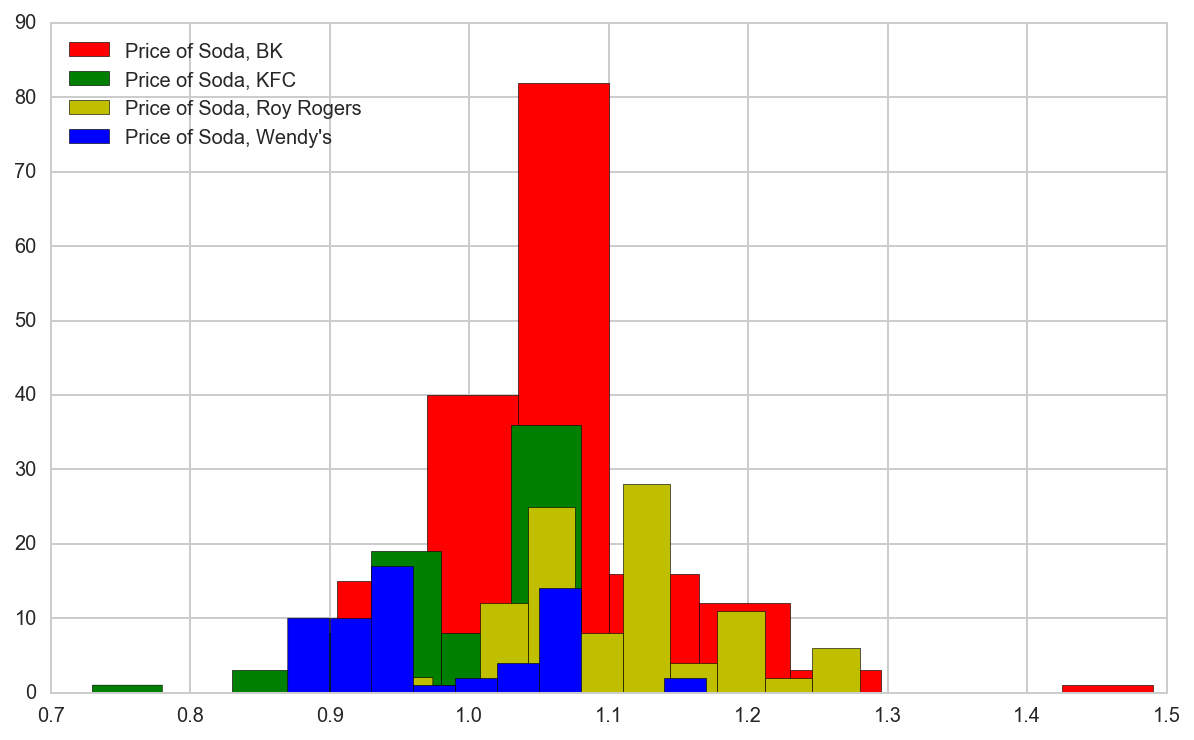

In [18]:
fig = plt.figure(figsize=(10,6))
fast_food[fast_food['chain']==1]['psoda'].hist(color='r', label='Price of Soda, BK')
fast_food[fast_food['chain']==2]['psoda'].hist(color='g', label='Price of Soda, KFC')
fast_food[fast_food['chain']==3]['psoda'].hist(color='y', label='Price of Soda, Roy Rogers')
fast_food[fast_food['chain']==4]['psoda'].hist(color='b', label= "Price of Soda, Wendy's")

plt.legend(loc='upper left')
plt.show()

#### 4. The variable income has one missing value. First, identify to what state "NJ=1 or PA=2" this missing value belongs to. Then drop the "row " that corresponds to this missing value fast_food.drop("row_number", axis=0)

In [28]:
fast_food = fast_food.drop(fast_food.loc[fast_food['income'].isnull()].index[0], axis=0)

#### 5. Graph the distribution of psoda for the entire dataset and include a line for the average in your graph.

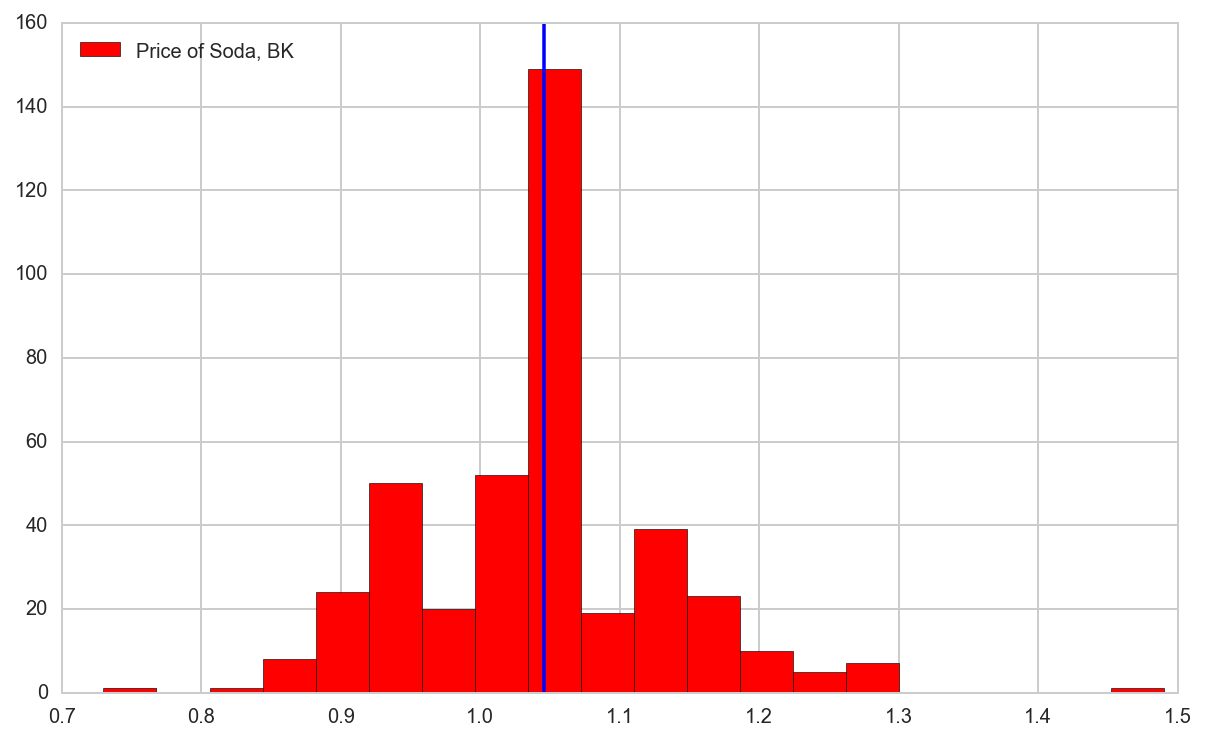

In [31]:
fig = plt.figure(figsize=(10,6))
fast_food['psoda'].hist(color='r', label='Price of Soda, BK', bins = 20)
plt.axvline(x=fast_food['psoda'].mean())

plt.legend(loc='upper left')
plt.show()

#### 6. Find the average values of _prpblck_ and _income_ in the sample, along with their standard deviations. Can you infer the units of measurement of these two variables (Get used to do this, these are your baseline values)

In [37]:
print 'prpblck mean:',fast_food.prpblck.mean()
print 'income mean:',fast_food.income.mean()

print 'prpblck std:',fast_food.prpblck.std()
print 'income std:',fast_food.income.std()

prpblck mean: 0.113486395844
income mean: 47053.7848411
prpblck std: 0.182416465423
income std: 13179.2860689


### Linear Regressions

#### 7.  Consider a model to explain the price of soda _psoda_, in terms of the proportion of the African American population and the median income
    
    psoda = β0 + β1prpblck + β2income + e


In [42]:
# Define your linear model 
#psoda = β0 + β1prpblck + β2income + e

# Define the target variable, called it y
y = fast_food['psoda']

# Define your predictors, called them X
X = fast_food[['prpblck','income']]

# Print the shapes of your y and X
print y.shape
print X.shape


(409,)
(409, 2)


In [45]:
lm = linear_model.LinearRegression()
# Fit your model
model = lm.fit(X, y)
# Predict your y, call them predictions, print the shape of predictions
predictions = lm.predict(X)
# Print the shape of predictions
print predictions.shape

(409,)


In [47]:
## Is there a difference between the means for actual values (psoda) and your predictions
print 'Predictions Mean:',predictions.mean()
print 'Actual Mean:',y.mean()

Predictions Mean: 1.0454259397
Actual Mean: 1.0454259397


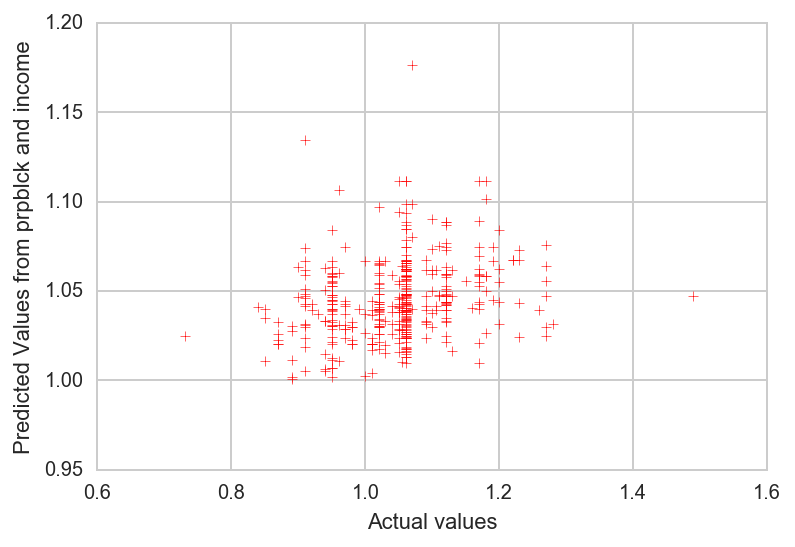

MSE: 0.00724966165558


In [50]:
## Construct a scatter plot of your model. Use your predicted values as your y axis and your y values as your x axis
## Print the Mean Square error see/read this link 
## http://mste.illinois.edu/patel/amar430/meansquare.html
plt.scatter(y, predictions, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Actual values")
plt.ylabel("Predicted Values from prpblck and income")
plt.show()

print 'MSE:',mean_squared_error(y,predictions)

In [52]:
## What is the coefficient of determination (R^2) of the prediction. In other words,what is the accuracy of your model?
score = lm.score(X,y)
print 'R^2:',score

R^2: 0.0633197857093


In [54]:
## Print the estimated coefficients of your model.
print 'Model coeffecients:',model.coef_

Model coeffecients: [  1.13185366e-01   1.59318232e-06]


In [55]:
## What is the intercept of your model.
print 'Model intercept:', model.intercept_

Model intercept: 0.957615682412


In [ ]:
## Write your results in equation form, include the sample size and R^2
## Interpret the coefficient on prpblck
y = 0.957615682412 + 1.13185366e-01 * prpblck + 1.59318232e-06 * income
sample size  = 506
R^2 = 0.0633197857093

### 8.  Compare the estimate from question 7 with a simple regression estimate from _psoda_ on _prpblck_. Is the discrimination effect larger or smaller when you control/include income on your predictors?
    
    psoda = β0 + β1prpblck + e

In [58]:
# Define your predictors and called them X
X = fast_food[['prpblck']]

# Print the shapes of your y and X
print y.shape
print X.shape

(409,)
(409, 1)


In [62]:
# Fit your model
lm = linear_model.LinearRegression()
lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [63]:
# find the predictors and called them predictions
predictions = lm.predict(X)
# print the shape of predictions
print predictions.shape

(409,)


In [64]:
## Is there a difference between the means for actual values (psoda) and your predictions
print predictions.mean()
print y.mean()

1.0454259397
1.0454259397


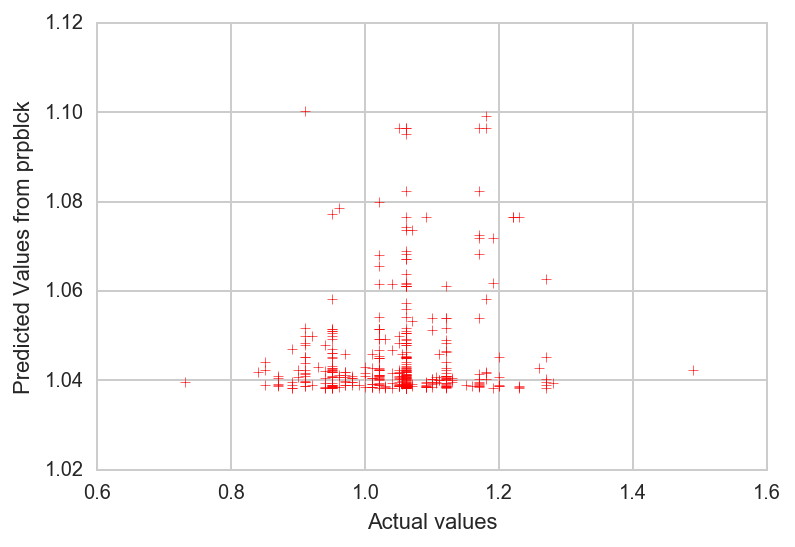

MSE: 0.00760680000723


In [65]:
## Construct a scatter plot of your model. Use your predicted values as your y axis and your y values as your x axis
## Print the Mean Square error 
plt.scatter(y, predictions, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Actual values")
plt.ylabel("Predicted Values from prpblck")
plt.show()

print 'MSE:',mean_squared_error(y,predictions)


In [66]:
## What is the accuracy of your model?
print 'R^2:',lm.score(X,y)


R^2: 0.0171763318978


In [67]:
## Print the estimated coefficients for the linear regression problem
lm.coef_

array([ 0.06328429])

In [68]:
## What is the intercept of your model.
lm.intercept_

1.0382440331921921

In [ ]:
## Write your results in equation form, include the sample size and R^2
y = 1.0382440331921921 + 0.06328429 * x

#### 9.  Now Use StatsModel and repeat questions 7 and 8
http://statsmodels.sourceforge.net/devel/example_formulas.html

##### Helpful Notes to Keep in mind:
1. P value for a coefficient says nothing about the size of the effect that variable is having on your dependent variable - it is possible to have a highly significant result (very small P-value) for a miniscule effect.
2. With a P value of 5% (or .05) there is only a 5% chance that results you are seeing would have come up in a 
random distribution, so you can say with a 95% probability of being correct that the variable is having some effect, assuming your model is specified correctly.
3. In simple or multiple linear regression, the size of the coefficient for each independent variable gives you 
the size of the effect that variable is having on your dependent/target (y) variable, and the sign on the coefficient 
(positive or negative) gives you the direction of the effect. In regression with a single independent/predictor variable, the coefficient tells you how much the dependent variable is expected to increase (if the coefficient is positive) or decrease (if the coefficient is negative) when that independent variable increases by one unit. 
4. In regression with multiple independent/predictors variables, the coefficient tells you how much the dependent variable is expected to increase when that independent variable increases by one unit, "_holding all the other independent variables constant_". Remember to keep in mind the units which your variables are measured in.

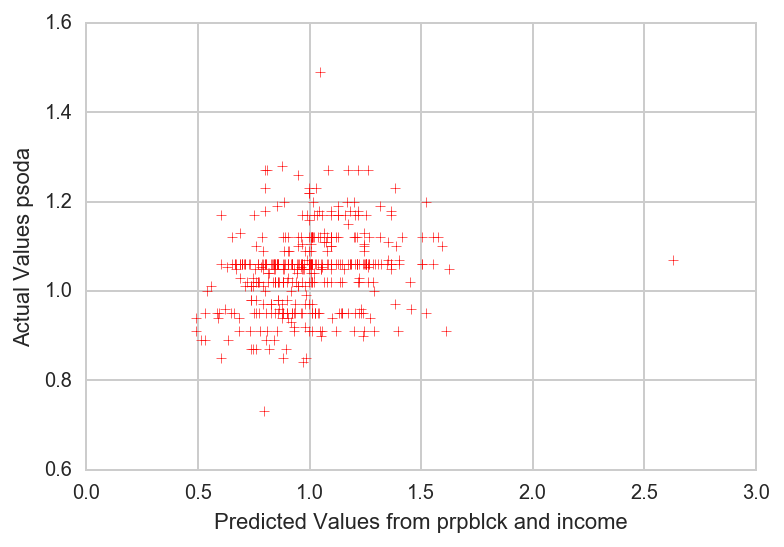

MSE: 0.0540586982747


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  psoda   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     3940.
Date:                Mon, 08 Aug 2016   Prob (F-statistic):          4.59e-267
Time:                        17:00:00   Log-Likelihood:                 16.321
No. Observations:                 409   AIC:                            -28.64
Df Residuals:                     407   BIC:                            -20.61
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
prpblck        0.8310      0.059     14.116      0.000         0.715     0.947
income      1.917e-05   2.59e-07     74.144      0.000      1.87e-05  1.97e-05
==============================================================================
Omnibus:                      122.930   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              621.384
Skew:                          -1.194   Prob(JB):                    1.17e-135
Kurtosis:                       8.546   Cond. No.                     2.50e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.5e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [75]:
import statsmodels.api as sm

X = fast_food[['prpblck','income']]
y = fast_food["psoda"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Plot the model
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from prpblck and income")
plt.ylabel("Actual Values psoda")
plt.show()

print "MSE:", mean_squared_error(y, predictions)
model.summary()


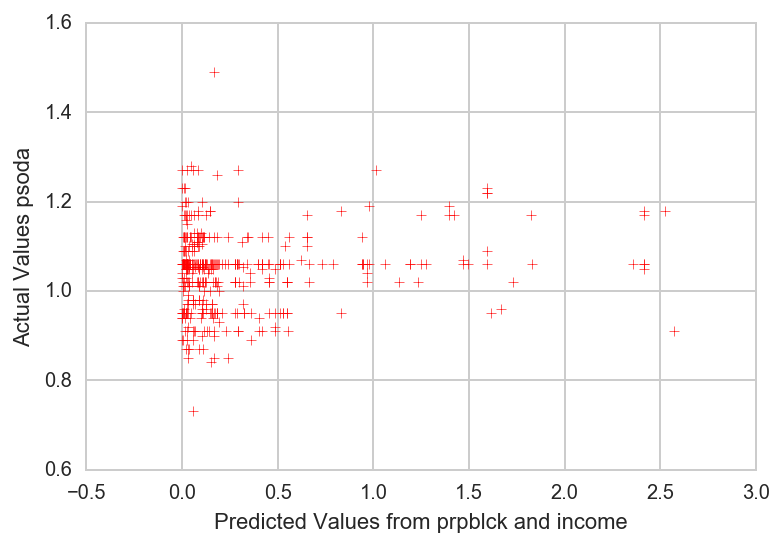

MSE: 0.784232843909


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  psoda   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     164.6
Date:                Mon, 08 Aug 2016   Prob (F-statistic):           6.83e-32
Time:                        17:03:32   Log-Likelihood:                -530.64
No. Observations:                 409   AIC:                             1063.
Df Residuals:                     408   BIC:                             1067.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
prpblck        2.6206      0.204     12.830      0.000         2.219     3.022
==============================================================================
Omnibus:                      233.616   Durbin-Watson:                   0.266
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1309.776
Skew:                          -2.535   Prob(JB):                    3.85e-285
Kurtosis:                      10.153   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
import statsmodels.api as sm

X = fast_food[['prpblck']]
y = fast_food["psoda"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Plot the model
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from prpblck and income")
plt.ylabel("Actual Values psoda")
plt.show()

print "MSE:", mean_squared_error(y, predictions)
model.summary()

#### 10. There is one fundamental step that I have "purposely" left out? Can you guess what this step is, and implement it. Use Matplotlib and Seaborn (regplot) to graph hem.

### Before you move to the next question, read this article "Why I'm not a fan of R-Squared"
http://www.johnmyleswhite.com/notebook/2016/07/23/why-im-not-a-fan-of-r-squared/

### Bonus
#### 11. Report the estimates of the follwing model (use sklearn):
    log(psoda) = β0 + β1prpblck + β2log(income) + e


In [ ]:
## If there are missing observations on any of the log variables, would you dropped them
## from the dataset, if so how does this impact your calculations?
## Fill the missing values of lpsoda with 0


In [ ]:
## Plot a histogram that will have 2 histograms showing the distribution of psoda and lpsoda
## Are they the same?


In [ ]:
## Plot a histogram of the variable log of income (lincome)


In [ ]:
## Plot a histogram of the variable income 


In [ ]:
## Can you explain what log is doing to the variables (income, and price of soda (psoda))

In [ ]:
## In one graph use seaborn regplot to graph
## graph psoda, vs lincome
## graph lpsoda vs income
## graph lpsoda vs lincome


In [ ]:
## graph lpsoda vs income


In [ ]:
# graph lpsoda vs lincome


In [ ]:
# Define your linear model 


# Define the target variable, called it y



# Define your predictors, called them X


# Print the shapes of your y and X




In [ ]:
# Fit your model


# Predict your y, call them predictions, print the shape of predictions
# Print the shape of predictions


In [ ]:
## Graph your predicted and y values


In [ ]:
## Print the coefficients, and R2, interpret your result 
## See/read this link for interpretation of results/coeficients: 
## http://www.ats.ucla.edu/stat/mult_pkg/faq/general/log_transformed_regression.htm



## Do you think that is model is more appropriate? 

In [ ]:
## Now add the variable prppov to the regression in question 11, What happened with prpblck?

# Define your linear model 


# Define the target variable, called it y



# Define your predictors, called them X


# Print the shapes of your y and X


In [ ]:
# Fit your model


# Predict your y, call them predictions, print the shape of predictions
# Print the shape of predictions

## Print the coefficients, and R2, interpret your result


In [ ]:
## Find the correlatoion between log(income) and prpov. Is it close to what you expected?


In [ ]:
## What are your thoughts on this statement:
## "Because log(income) and prppov are so highky correlated, they have no business in being 
## included in the same regression"